In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [28]:
# Load the bank transaction history
bank_transactions = pd.read_excel('C:/Users/sudet/Documents/GitHub/CS210-Data-Science-Term-Project/bank_expenses.xlsx')

# Load the daily emotional log
emotional_log = pd.read_excel('C:/Users/sudet/Documents/GitHub/CS210-Data-Science-Term-Project/emotional_state_info.xlsx')

In [20]:
# Merge bank_transactions with emotional_log on the Date column
final_dataset = pd.merge(bank_transactions, emotional_log, on='Date', how='left')

# Save the final dataset to a new Excel file
final_dataset.to_excel('final_dataset.xlsx', index=False)

In [31]:
final_dataset = pd.read_excel('final_dataset.xlsx')
final_dataset.head()

,Date,Time,Amount,Balance,Description,Category,Emotional State
0,25.10.2024,23:42,-257.99,17224.27,046 DOLAP.COM XXXX 6703,thrifting,strong positive
1,25.10.2024,19:47,-1939.95,17482.26,046 IYZICO /ZARA.COM XXXX 6703 3D,clothing,strong positive
2,25.10.2024,15:29,-70.00,19422.21,062 PIZZA RESTAURANTLARI XXXX 6703,food,strong positive
3,25.10.2024,12:34,-32.00,19492.21,046 7036 İSTANBUL SABANC TEMASSIZ XXXX 6703,market,strong positive
4,25.10.2024,12:28,-20.00,19524.21,7777/MBL-HAV.ALİ OSMAN TERLEMEZ,other,strong positive


In [35]:
df = pd.read_excel('C:/Users/sudet/Documents/GitHub/CS210-Data-Science-Term-Project/final_dataset.xlsx')

In [36]:
print("Column Names:", df.columns)
print(df.head())

Column Names: Index(['Date', 'Time', 'Amount', 'Balance', 'Description', 'Category',
       'Emotional State'],
      dtype='object')
         Date   Time   Amount   Balance  \
0  25.10.2024  23:42  -257.99  17224.27   
1  25.10.2024  19:47 -1939.95  17482.26   
2  25.10.2024  15:29   -70.00  19422.21   
3  25.10.2024  12:34   -32.00  19492.21   
4  25.10.2024  12:28   -20.00  19524.21   

                                   Description   Category  Emotional State  
0           046 DOLAP.COM            XXXX 6703  thrifting  strong positive  
1        046 IYZICO /ZARA.COM     XXXX 6703 3D   clothing  strong positive  
2           062 PIZZA RESTAURANTLARI XXXX 6703       food  strong positive  
3  046 7036 İSTANBUL SABANC TEMASSIZ XXXX 6703     market  strong positive  
4              7777/MBL-HAV.ALİ OSMAN TERLEMEZ      other  strong positive  


In [37]:
df.shape  # Check rows and columns

(798, 7)

In [38]:
df.info()  # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             798 non-null    object 
 1   Time             798 non-null    object 
 2   Amount           798 non-null    float64
 3   Balance          798 non-null    float64
 4   Description      798 non-null    object 
 5   Category         798 non-null    object 
 6   Emotional State  679 non-null    object 
dtypes: float64(2), object(5)
memory usage: 43.8+ KB


In [39]:
df.describe(include='all')  # Summary statistics

,Date,Time,Amount,Balance,Description,Category,Emotional State
count,798,798,798.000000,798.000000,798,798,679
unique,390,514,NaN,NaN,197,14,7
top,30.09.2024,10:44,NaN,NaN,062 PIZZA RESTAURANTLARI XXXX 6703,food,neutral
freq,14,30,NaN,NaN,59,222,159
mean,NaN,NaN,-506.930113,9965.221065,NaN,NaN,NaN
std,NaN,NaN,1635.671300,7631.623366,NaN,NaN,NaN
min,NaN,NaN,-24000.000000,3.110000,NaN,NaN,NaN
25%,NaN,NaN,-249.750000,4837.732500,NaN,NaN,NaN
50%,NaN,NaN,-100.000000,7616.830000,NaN,NaN,NaN
75%,NaN,NaN,-40.125000,13508.330000,NaN,NaN,NaN


In [40]:
missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data)

Missing values per column:
 Date                 0
Time                 0
Amount               0
Balance              0
Description          0
Category             0
Emotional State    119
dtype: int64


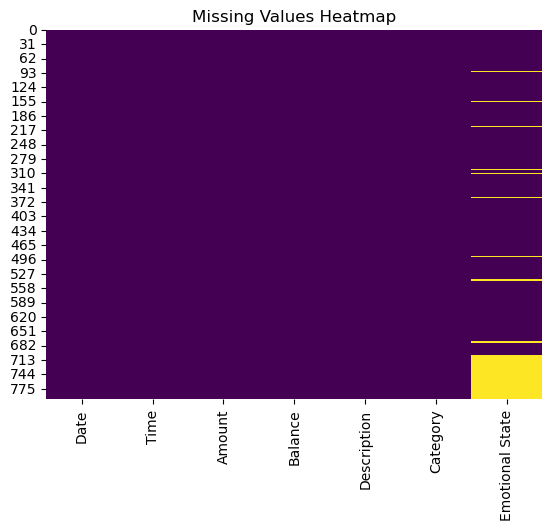

In [42]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [43]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Filter the dataframe to keep only rows with Date on or after 01.01.2023
df = df[df['Date'] >= pd.to_datetime('01.01.2023', format='%d.%m.%Y')]

# Display the first few rows of the filtered dataframe
df.head()

,Date,Time,Amount,Balance,Description,Category,Emotional State
0,2024-10-25,23:42,-257.99,17224.27,046 DOLAP.COM XXXX 6703,thrifting,strong positive
1,2024-10-25,19:47,-1939.95,17482.26,046 IYZICO /ZARA.COM XXXX 6703 3D,clothing,strong positive
2,2024-10-25,15:29,-70.00,19422.21,062 PIZZA RESTAURANTLARI XXXX 6703,food,strong positive
3,2024-10-25,12:34,-32.00,19492.21,046 7036 İSTANBUL SABANC TEMASSIZ XXXX 6703,market,strong positive
4,2024-10-25,12:28,-20.00,19524.21,7777/MBL-HAV.ALİ OSMAN TERLEMEZ,other,strong positive


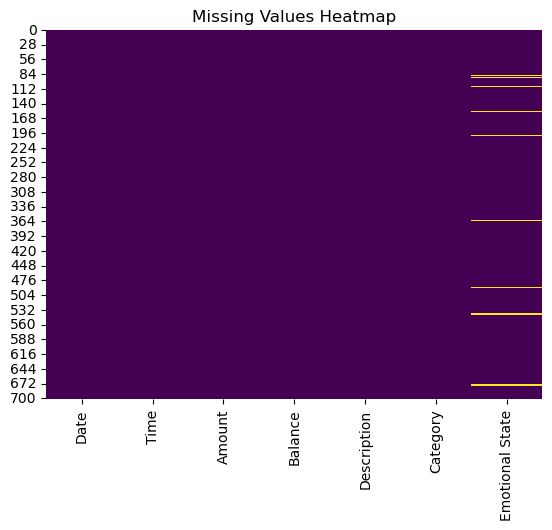

In [44]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()